In [ ]:
# Load module
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import color
from PIL import Image
from pylab import *
from keras.preprocessing.image import save_img

### Segmentation bsed on color information

Here we express the image using four colors, green, dark green, yellow and black.

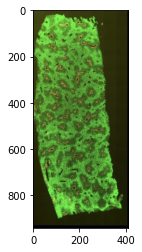

In [177]:
# Read the img using its google drive path
img_color = array(Image.open('IMG_2313.jpeg'))                                  #cv2.imread('/Users/wy2374/Desktop/IMG_2313.jpeg')

# Show the img
imshow(img_color)

In [ ]:
'''
### If I try to convert it to a gray image
img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
imshow(img_gray)
'''

'\n### If I try to convert it to a gray image\nimg_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)\nimg_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)\nimshow(img_gray)\n'

In [ ]:
# Since we use HSV rather than RGB here, 
# we find the expression of three color under HSV
green = np.uint8([[[0, 255, 0]]])                                               # green in RGB. in hsv, all the green in the region between [45, 100, 50] and [75, 255, 255]
green_hsv = cv2.cvtColor(green ,cv2.COLOR_BGR2HSV)
print(green_hsv)                                                                # ([[[ 60 255 255]]]) shows green in hsv, all the green in the region between [60-15, 100, 50] and [60+15, 255, 255]


yellow = np.uint8([[[255, 255, 0]]])
yellow_hsv = cv2.cvtColor(yellow ,cv2.COLOR_BGR2HSV)
print(yellow_hsv)                                                               # [[[ 90 255 255]]]


dark_green = np.uint8([[[0,100,0]]])
dark_green_hsv = cv2.cvtColor(dark_green ,cv2.COLOR_BGR2HSV)
print(dark_green_hsv)                                                           # [[[ 60 255 100]]]

[[[ 60 255 255]]]


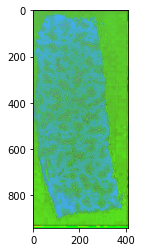

In [ ]:
# convert the image to a hsv image
# Just a show...
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
imshow(img_hsv)

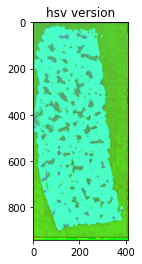

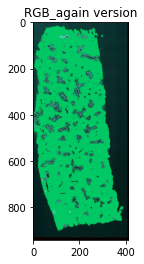

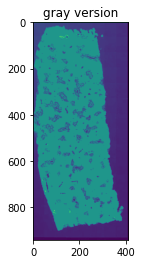

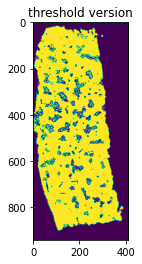

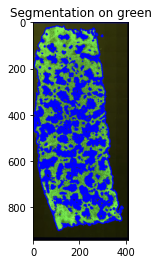

In [180]:
# Segment the picture based on the fundamental information of green color
# show the process and the main part

img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
green_low = np.array([45 , 100, 50] ) 
green_high = np.array([75, 255, 255]) 
curr_mask = cv2.inRange(img_hsv, green_low, green_high) 
img_hsv[curr_mask > 0] = ([75,255,200]) 
plt.title('hsv version')
imshow(img_hsv) 
plt.show()

RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_again version')
imshow(RGB_again) 
plt.show()

gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY) 
imshow(gray) ## 3 
plt.title('gray version')
#axis('off')
plt.show()

ret, threshold = cv2.threshold(gray, 90, 255, 0) 
imshow(threshold) ## 4 
plt.title('threshold version')
#axis('off')
plt.show()

contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(img_color, contours, -1, (0, 0, 255), 3) 
imshow(img_color)
plt.title('Segmentation on green')
plt.show()
save_img('drive/MyDrive/img_color_on_green_based.jpg', img_color)

#### Improved part of segmentation
Which one is the best?

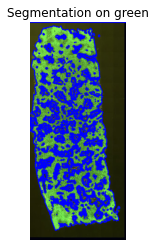

In [179]:
## Improve the quality of segmentation on green part 
## reset the high green value and the low green value
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
green_low = np.array([50 , 100, 90] )  #[45 , 100, 50]
green_high = np.array([75, 255, 255]) 
curr_mask = cv2.inRange(img_hsv, green_low, green_high) 
img_hsv[curr_mask > 0] = ([75,255,200]) 
plt.title('hsv version')
imshow(img_hsv) 
#plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_again version')
imshow(RGB_again) 
#plt.show()
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY) 
imshow(gray) ## 3 
plt.title('gray version')
axis('off')
#plt.show()
ret, threshold = cv2.threshold(gray, 120, 255, 0) 
imshow(threshold) ## 4 
plt.title('threshold version')
axis('off')
#plt.show()
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(img_color, contours, -1, (0, 0, 255), 3) 
imshow(img_color)
plt.title('Segmentation on green')
plt.show()
save_img('drive/MyDrive/img_color_on_green_compare1.jpg', img_color)

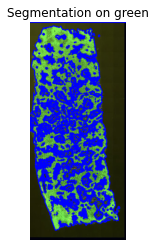

In [181]:
## Improve the quality of segmentation on green part 
## reset the high green value and the low green value
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
green_low = np.array([50 , 100, 100] )  #[45 , 100, 50]
green_high = np.array([75, 255, 255]) 
curr_mask = cv2.inRange(img_hsv, green_low, green_high) 
img_hsv[curr_mask > 0] = ([75,255,200]) 
plt.title('hsv version')
imshow(img_hsv) 
#plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_again version')
imshow(RGB_again) 
#plt.show()
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY) 
imshow(gray) ## 3 
plt.title('gray version')
axis('off')
#plt.show()
ret, threshold = cv2.threshold(gray, 110, 255, 0)  ## Here we try to morphing the yellow
imshow(threshold) ## 4 
plt.title('threshold version')
axis('off')
#plt.show()
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(img_color, contours, -1, (0, 0, 255), 3) 
imshow(img_color)
plt.title('Segmentation on green')
plt.show()
save_img('drive/MyDrive/img_color_on_green_compare2.jpg', img_color)

#### Show three different parts one by one

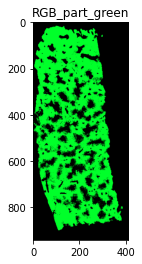

In [185]:
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
# green mask (intermediate between green and yellow)
green_low = np.array([50 , 100, 100] )  #[45 , 100, 50]
green_high = np.array([75, 255, 255]) 
curr_mask_green = cv2.inRange(img_hsv, green_low, green_high)

img_hsv[curr_mask_green != 0] = ([65,255,255])
img_hsv[curr_mask_green == 0] = ([0,0,0])

plt.title('hsv version')
imshow(img_hsv) 
#plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_part_green')
imshow(RGB_again)
plt.show()
save_img('drive/MyDrive/RGB_part_green.jpg', RGB_again)

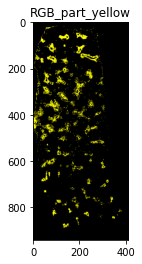

In [187]:
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
# yellow mask (intermediate between green and yellow)
# yellow mask
yellow_low = np.array([75 , 100, 100])
yellow_high = np.array([105, 255, 255])
curr_mask_yellow = cv2.inRange(img_hsv, yellow_low, yellow_high)

img_hsv[curr_mask_yellow != 0] = ([30,255,255]) 
img_hsv[curr_mask_yellow == 0] = ([0,0,0])

plt.title('hsv version')
imshow(img_hsv) 
#plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_part_yellow')
imshow(RGB_again)
plt.show()
save_img('drive/MyDrive/RGB_part_yellow.jpg', RGB_again)

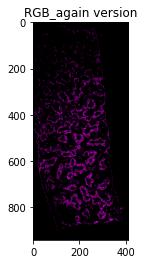

In [188]:
## try to identify the dark green part of the image
## Since dark green is hard to idetify, I use purple to represent it
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
# dark green mask (intermediate between green and yellow)
dark_green_low = np.array([45 , 80, 80])
dark_green_high = np.array([75, 255, 100])
curr_mask_dark_green = cv2.inRange(img_hsv, dark_green_low, dark_green_high)

img_hsv[curr_mask_dark_green != 0] = ([150,255,255])
img_hsv[curr_mask_dark_green == 0] = ([0,0,0])

plt.title('hsv version')
imshow(img_hsv) 
#plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_part_dark_green')
imshow(RGB_again)
plt.show()
save_img('drive/MyDrive/RGB_part_dark_green.jpg', RGB_again)

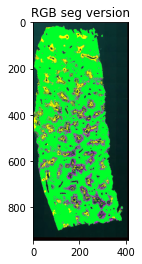

In [193]:
## Combine the process of segmentation
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

# green mask
green_low = np.array([50 , 100, 100])  #[45 , 100, 50]
green_high = np.array([75, 255, 255]) 
curr_mask_green = cv2.inRange(img_hsv, green_low, green_high) 

# yellow mask
yellow_low = np.array([75 , 100, 100])
yellow_high = np.array([105, 255, 255])
curr_mask_yellow = cv2.inRange(img_hsv, yellow_low, yellow_high)

# dark green mask (intermediate between green and yellow)
dark_green_low = np.array([45 , 50, 80])
dark_green_high = np.array([75, 255, 100])
curr_mask_dark_green = cv2.inRange(img_hsv, dark_green_low, dark_green_high)

img_hsv[curr_mask_yellow != 0] = ([30,255,255]) 
img_hsv[curr_mask_green != 0] = ([65,255,255])
img_hsv[curr_mask_dark_green != 0] = ([150,255,255])

#img_hsv[curr_mask_yellow ==0 & curr_mask_green == 0] = ([0,0,0])
#img_hsv[curr_mask != 0] = ([255,255,255]) # turn the image to binary
#error: img_hsv[img_hsv != ([75,255,200])] = ([0,0,0])
plt.title('hsv version')
imshow(img_hsv) 
# plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB seg version')
imshow(RGB_again)
plt.show()
save_img('drive/MyDrive/RGB_seg.jpg', RGB_again)

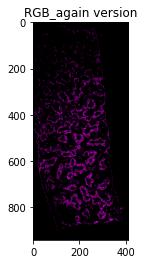

In [176]:
##########################################################################
'''What I intend to improve this week : Segmentation on dark green part'''
##########################################################################

## try to identify dark green part of the image
img_color = array(Image.open('IMG_2313.jpeg'))
img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
# dark green mask (intermediate between green and yellow)
dark_green_low = np.array([45 , 80, 80])
dark_green_high = np.array([75, 255, 100])
curr_mask_dark_green = cv2.inRange(img_hsv, dark_green_low, dark_green_high)

img_hsv[curr_mask_dark_green != 0] = ([150,255,255])
img_hsv[curr_mask_dark_green == 0] = ([0,0,0])

plt.title('hsv version')
imshow(img_hsv) 
#plt.show()
RGB_again = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) 
plt.title('RGB_again version')
imshow(RGB_again)
plt.show()
save_img('drive/MyDrive/RGB_again_test.jpg', RGB_again)

### Denoising part

In [ ]:
# Using garbor filter to denoise the image (RGB_again)
import numpy as np
import pylab
import cv2
import math
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import distance
from scipy import signal

def m1(x , y, f): #Compute M1 as in the paper
    return np.cos(2*np.pi*f*math.sqrt(x **2 + y**2))

def m2(x , y, f, theta): #Compute M2 as in the paper
    return np.cos(2*np.pi*(x*np.cos(theta)+y*np.sin(theta)))

def gabor1(x, y, dx, dy, f): #Compute Gabor as in the paper with M1
    return (1/(2*math.pi*dx*dy))*np.exp(-0.5*(x**2 / dx**2 + y**2 / dy**2)) * m1(x, y, f)
    
def gabor2(x, y, dx, dy, f, theta): #Compute Gabor as in the paper with M2
    return (1/(2*math.pi*dx*dy))*np.exp(-0.5*(x**2 / dx**2 + y**2 / dy**2)) * m2(x, y, f, theta)

def filters(dx, dy, f): #Create filter for 4*4 small blocks with Gabor and M1, the image has 1000*400 in total
    square = np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            square[i,j]=gabor1(j-2,i-2,dx,dy,f)
    return square

def convolution(image):
    list1=[]
    list2=[]
    # We use the defined spatial filters in two channels to acquire the most 
    # discriminating iris features, i.e., gabor filter rather than Ma filter.
    filter1 = filters(1.5,0.67,3)
    filter2 = filters(1.5,0.67,4.5) 
    # Convert image in gray scale...but not necessary
    filtered1 = scipy.signal.convolve2d(image,filter1,mode='same')
    filtered2 = scipy.signal.convolve2d(image,filter2,mode='same')
    imshow(filtered1)
    plt.show()
    imshow(filtered2)
    plt.show()

In [ ]:
## If I change the RGB_again image to a gray image
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
imshow(gray)
## then plot histogram, to enhance the image, but here i don't use the method

In [149]:
#############################################################
'''What I intend to do this week : Some methods to denoise'''
#############################################################
'''
from PIL import Image 
from pylab import * 
import rof
im = array(RGB_again).convert('L')
U,T = rof.denoise(im,im)
figure() 
gray() 
imshow(U) zzzz
axis('equal')
axis('off') 
show()
'''

"\nfrom PIL import Image \nfrom pylab import * \nimport rof\nim = array(RGB_again).convert('L')\nU,T = rof.denoise(im,im)\nfigure() \ngray() \nimshow(U) zzzz\naxis('equal')\naxis('off') \nshow()\n"